In [5]:
import pandas as pd

c:\Users\HPr\Desktop\Projekte\Travel_Package_Project\venv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
train_file_path=r"C:\Users\HPr\Desktop\Projekte\Travel_Package_Project\package\ordner\data_ingestion\2022-07-28-22-24-08\ingested_data\train\TourismData.csv"
df=pd.read_csv(train_file_path)

In [7]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,NaN,Self Enquiry,3,6.0,Small Business,Male,2,1.0,Deluxe,5.0,Married,2.0,0,4,0,0.0,Manager,NaN
1,0,NaN,Self Enquiry,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,5,0,2.0,Executive,18477.0
2,0,35.0,Company Invited,1,10.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,2.0,0,2,1,1.0,Manager,26434.0
3,0,38.0,Self Enquiry,1,26.0,Salaried,Male,4,4.0,Basic,4.0,Married,6.0,0,4,0,2.0,Executive,21700.0
4,0,38.0,Self Enquiry,1,6.0,Salaried,Female,2,3.0,Basic,5.0,Single,4.0,0,2,1,1.0,Executive,17619.0


In [8]:
df['ProdTaken']

0       0
1       0
2       0
3       0
4       0
       ..
3905    0
3906    0
3907    1
3908    1
3909    1
Name: ProdTaken, Length: 3910, dtype: int64

In [11]:
# creating list of category columns that are not object type
cat_cols = ["CityTier","ProdTaken","NumberOfPersonVisiting","NumberOfChildrenVisiting","PreferredPropertyStar","Passport","PitchSatisfactionScore","OwnCar"]
df[cat_cols] = df[cat_cols].astype("category")

In [13]:
# selecting all object datatypes and converting to category
cols = df.select_dtypes(["object"])
for i in cols.columns:
    df[i] = df[i].astype("category")

In [14]:
# check the dataset for updated datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 3910 non-null   category
 1   Age                       3727 non-null   float64 
 2   TypeofContact             3893 non-null   category
 3   CityTier                  3910 non-null   category
 4   DurationOfPitch           3716 non-null   float64 
 5   Occupation                3910 non-null   category
 6   Gender                    3910 non-null   category
 7   NumberOfPersonVisiting    3910 non-null   category
 8   NumberOfFollowups         3871 non-null   float64 
 9   ProductPitched            3910 non-null   category
 10  PreferredPropertyStar     3891 non-null   category
 11  MaritalStatus             3910 non-null   category
 12  NumberOfTrips             3803 non-null   float64 
 13  Passport                  3910 non-null   catego

In [15]:
# check number of null records
df.isna().sum()

ProdTaken                     0
Age                         183
TypeofContact                17
CityTier                      0
DurationOfPitch             194
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            39
ProductPitched                0
PreferredPropertyStar        19
MaritalStatus                 0
NumberOfTrips               107
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     53
Designation                   0
MonthlyIncome               183
dtype: int64

In [17]:
# replace the missing values with median income w.r.t the customer"s designation
df["MonthlyIncome"] = df.groupby(["Designation"])["MonthlyIncome"].transform(lambda x: x.fillna(x.median()))
df["Age"] = df.groupby(["Designation"])["Age"].transform(lambda x: x.fillna(x.median()))

In [18]:
#Treat other numerical columns for missing values¶
# create list of numerical columns
import numpy as np
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()

In [20]:
# remove Age and MonthlyIncome as we have already treated these columns
missing_numerical.remove("MonthlyIncome")
missing_numerical.remove("Age")

ValueError: list.remove(x): x not in list

In [21]:
# function for replacing with the Median value of the attributes
medianFiller = lambda x: x.fillna(x.median()) 

In [23]:
# apply the function
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)


In [25]:
#create a list of categorical columns
cat_cols =  df.select_dtypes(["category"])

#get the valuecounts
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print("-"*50)
    print("\n")

In [28]:
#Treat the other columns for missing values
# treating missing values in remaining categorical variables
df["TypeofContact"] = df["TypeofContact"].fillna("Self Enquiry")
df["NumberOfChildrenVisiting"] = df["NumberOfChildrenVisiting"].fillna(1.0)
df["PreferredPropertyStar"] = df["PreferredPropertyStar"].fillna(3.0)

In [29]:
#Treat the error in Gender column
# treating error
df.Gender = df.Gender.replace("Fe Male","Female")

# verify the update
df.Gender.value_counts()

Male      2321
Female    1589
Name: Gender, dtype: int64

In [30]:
#Verify the missing value treatment
# count of null records
df.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [248]:
# summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3910.0,37.467263,9.169467,18.0,31.00,36.0,43.0,61.0
DurationOfPitch,3910.0,15.422251,8.437237,5.0,9.00,13.0,19.0,127.0
NumberOfFollowups,3910.0,3.707928,0.999930,1.0,3.00,4.0,4.0,6.0
NumberOfTrips,3910.0,3.228900,1.824630,1.0,2.00,3.0,4.0,22.0
MonthlyIncome,3910.0,23549.456266,5307.094328,4678.0,20475.25,22372.5,25433.0,98678.0


In [249]:
# summary of categorical columns
df.describe(include="category").T

,count,unique,top,freq
ProdTaken,3910,2,0,3174
TypeofContact,3910,2,Self Enquiry,2768
CityTier,3910,3,1,2557
Occupation,3910,4,Salaried,1892
Gender,3910,2,Male,2321
NumberOfPersonVisiting,3910,5,3,1928
ProductPitched,3910,5,Basic,1474
PreferredPropertyStar,3910,3,3,2403
MaritalStatus,3910,4,Married,1874
Passport,3910,2,0,2765


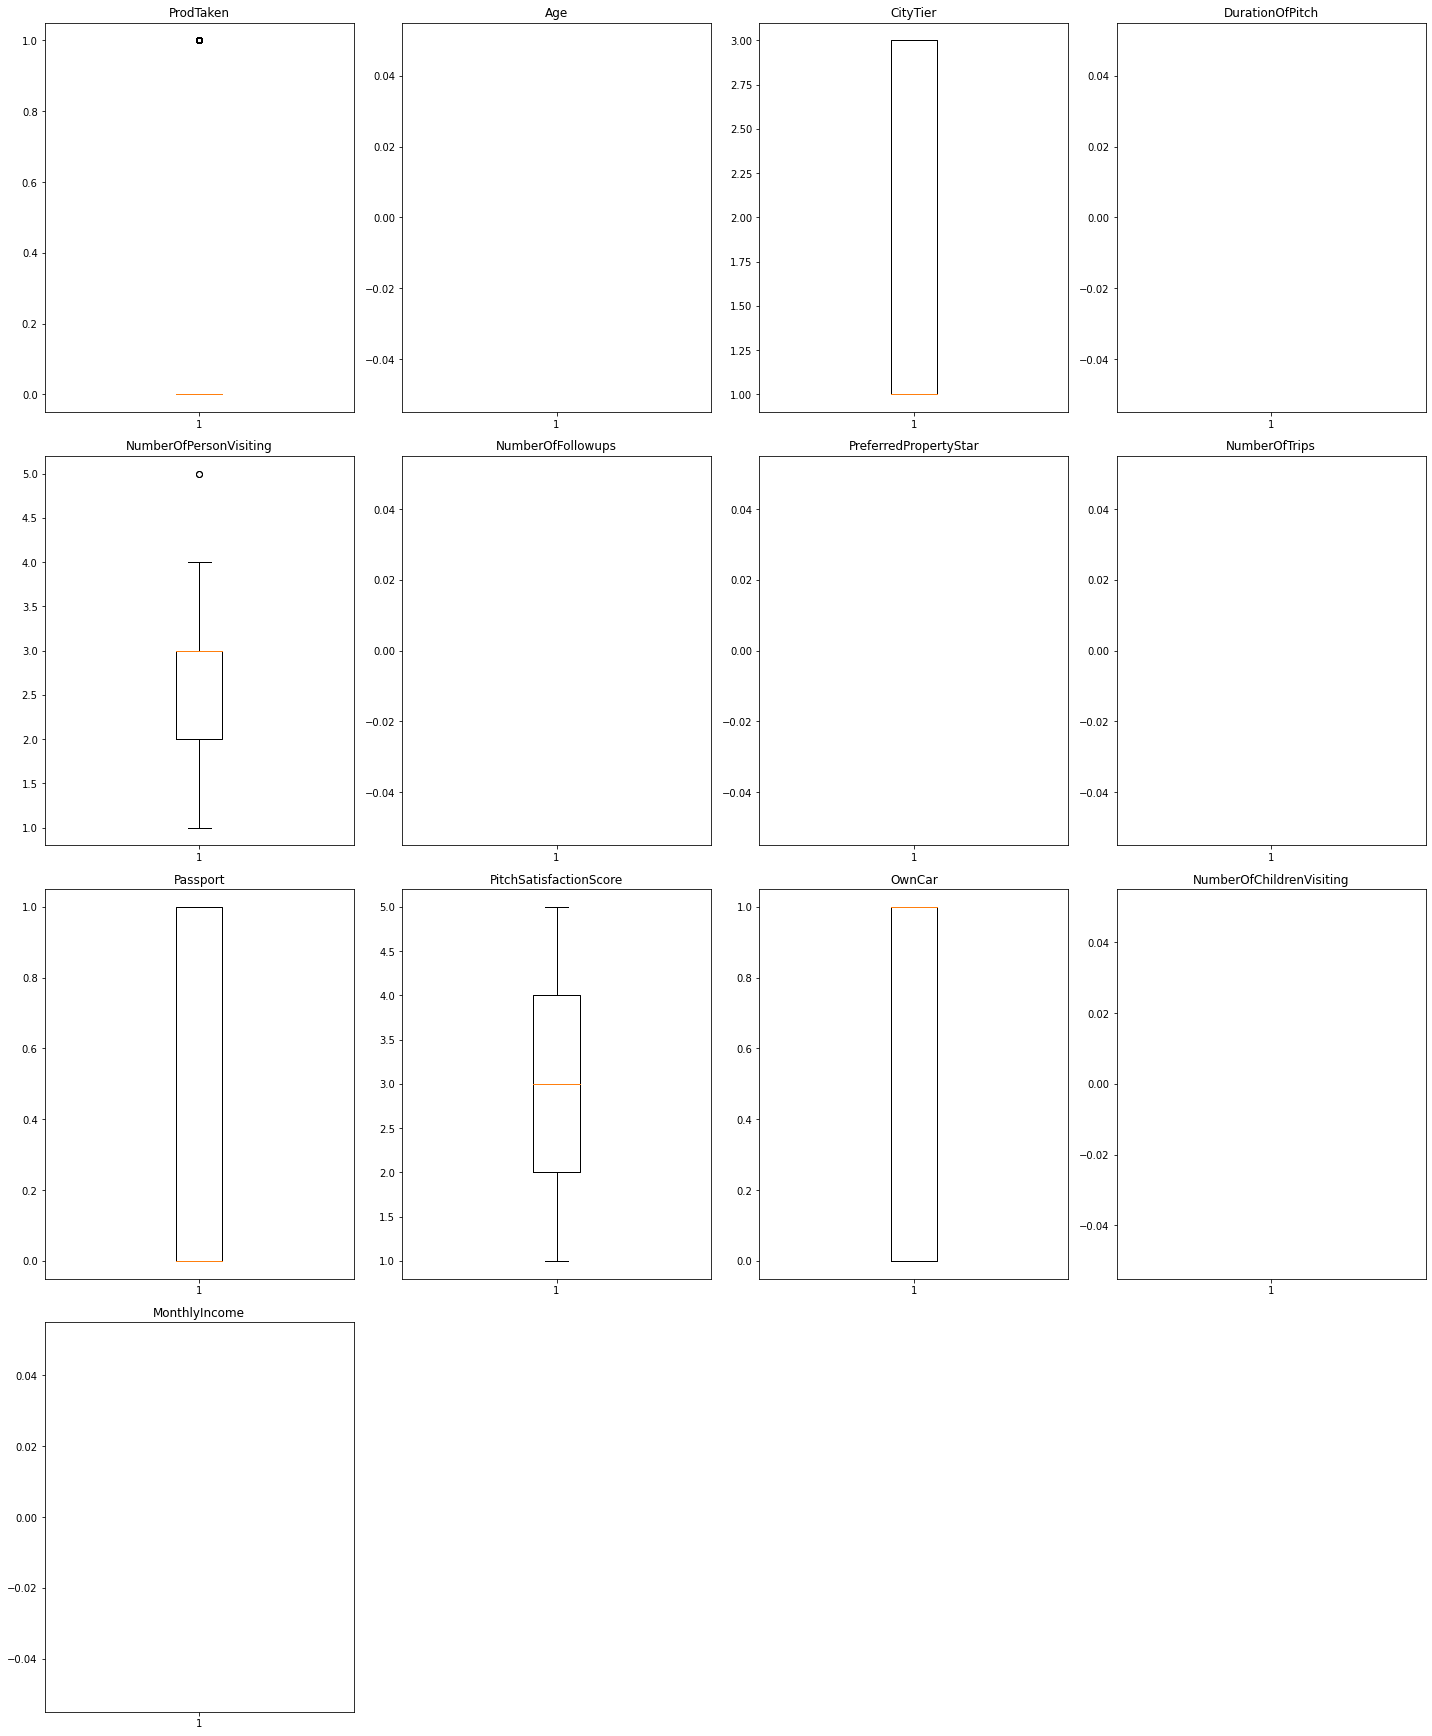

In [13]:
#Outliers Treatment
# check the outliers before treating

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 30))
num_cols=[feature for feature in df.columns if df[feature].dtypes!='O']

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [14]:
#Lets check the percentage of Outliers with IQR
outlier_num = df.select_dtypes(include=np.number)

In [15]:
outlier_num

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,0,NaN,3,6.0,2,1.0,5.0,2.0,0,4,0,0.0,NaN
1,0,NaN,1,8.0,3,3.0,3.0,2.0,0,5,0,2.0,18477.0
2,0,35.0,1,10.0,3,4.0,3.0,2.0,0,2,1,1.0,26434.0
3,0,38.0,1,26.0,4,4.0,4.0,6.0,0,4,0,2.0,21700.0
4,0,38.0,1,6.0,2,3.0,5.0,4.0,0,2,1,1.0,17619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0,39.0,3,21.0,3,3.0,5.0,1.0,0,1,1,2.0,28341.0
3906,0,48.0,1,6.0,2,4.0,5.0,1.0,0,4,0,1.0,30402.0
3907,1,25.0,3,10.0,4,4.0,3.0,2.0,0,2,1,1.0,23255.0
3908,1,26.0,1,10.0,4,4.0,5.0,7.0,0,5,1,2.0,22709.0


In [31]:
df.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [32]:
# find the 25th percentile and 75th percentile.
Q1 = df.quantile(0.25)            
Q3 = df.quantile(0.75)

# Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1                           

# find lower and upper bounds for all values. All values outside these bounds are outliers
lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100

ProdTaken                   18.823529
Age                          0.000000
CityTier                     0.000000
DurationOfPitch              2.352941
NumberOfPersonVisiting       0.051151
NumberOfFollowups            6.470588
PreferredPropertyStar        0.000000
NumberOfTrips                2.276215
Passport                     0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.391304
dtype: float64

In [69]:
# split the columns in Dependent and Independent Set
X= df.drop(["ProdTaken","PitchSatisfactionScore","ProductPitched","NumberOfFollowups","DurationOfPitch"],axis=1)
y= df["ProdTaken"]

In [70]:
# use get_dummies function to convert the categorical columns
X = pd.get_dummies(X, drop_first=True)

In [71]:
# splitting data into training and test set, use stratify to maintain the original distribution of Dependent variable as of original set
from sklearn.model_selection import GridSearchCV, train_test_split

X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=25,stratify=y)

# creating a list of column names
feature_names = X_train.columns.to_list()
feature_names

['Age',
 'CityTier',
 'NumberOfPersonVisiting',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome',
 'TypeofContact_Self Enquiry',
 'Occupation_Large Business',
 'Occupation_Salaried',
 'Occupation_Small Business',
 'Gender_Male',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MaritalStatus_Unmarried',
 'Designation_Executive',
 'Designation_Manager',
 'Designation_Senior Manager',
 'Designation_VP']

In [75]:
from sklearn import metrics
# libraries to build Linear Regression Model
from sklearn.linear_model import LogisticRegression

# libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libraries to build ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
)

# library for stacking classifier
from sklearn.ensemble import StackingClassifier

# to tune different models
from sklearn.model_selection import GridSearchCV, train_test_split

# to get diferent metric scores
from sklearn.metrics import (
    f1_score,accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
)

In [76]:
#Check the split of target variable ProdTaken
print("Original ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df["ProdTaken"] == 1]), (len(df.loc[df["ProdTaken"] == 1])/len(df.index)) * 100))
print("Original ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df["ProdTaken"] == 0]), (len(df.loc[df["ProdTaken"] == 0])/len(df.index)) * 100))
print("")
print("Training ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test ProdTaken True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test ProdTaken False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original ProdTaken True Values    : 736 (18.82%)
Original ProdTaken False Values   : 3174 (81.18%)

Training ProdTaken True Values    : 515 (18.82%)
Training ProdTaken False Values   : 2222 (81.18%)

Test ProdTaken True Values        : 221 (18.84%)
Test ProdTaken False Values       : 952 (81.16%)


In [77]:
# DecistionTreeClassifier with gini and class_weight for appropriate importance
dtc = DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1)

In [78]:
# fit the model on training dataset
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [79]:
dtc.score(X_train, y_train)

1.0

In [80]:
dtc.score(X_test, y_test)

0.8414322250639387

In [33]:
x,y= df.drop(columns=['ProdTaken'],axis=1),df[['ProdTaken']]

In [34]:
x.shape

(3910, 18)

In [36]:
x

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,36.0,Self Enquiry,3,6.0,Small Business,Male,2,1.0,Deluxe,5.0,Married,2.0,0,4,0,0.0,Manager,22876.0
1,32.0,Self Enquiry,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,5,0,2.0,Executive,18477.0
2,35.0,Company Invited,1,10.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,2.0,0,2,1,1.0,Manager,26434.0
3,38.0,Self Enquiry,1,26.0,Salaried,Male,4,4.0,Basic,4.0,Married,6.0,0,4,0,2.0,Executive,21700.0
4,38.0,Self Enquiry,1,6.0,Salaried,Female,2,3.0,Basic,5.0,Single,4.0,0,2,1,1.0,Executive,17619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,39.0,Self Enquiry,3,21.0,Small Business,Male,3,3.0,Super Deluxe,5.0,Unmarried,1.0,0,1,1,2.0,AVP,28341.0
3906,48.0,Self Enquiry,1,6.0,Salaried,Female,2,4.0,Super Deluxe,5.0,Divorced,1.0,0,4,0,1.0,AVP,30402.0
3907,25.0,Self Enquiry,3,10.0,Salaried,Female,4,4.0,Deluxe,3.0,Unmarried,2.0,0,2,1,1.0,Manager,23255.0
3908,26.0,Self Enquiry,1,10.0,Small Business,Male,4,4.0,Basic,5.0,Divorced,7.0,0,5,1,2.0,Executive,22709.0


In [37]:
y.shape

(3910, 1)

In [38]:
x

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,36.0,Self Enquiry,3,6.0,Small Business,Male,2,1.0,Deluxe,5.0,Married,2.0,0,4,0,0.0,Manager,22876.0
1,32.0,Self Enquiry,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,5,0,2.0,Executive,18477.0
2,35.0,Company Invited,1,10.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,2.0,0,2,1,1.0,Manager,26434.0
3,38.0,Self Enquiry,1,26.0,Salaried,Male,4,4.0,Basic,4.0,Married,6.0,0,4,0,2.0,Executive,21700.0
4,38.0,Self Enquiry,1,6.0,Salaried,Female,2,3.0,Basic,5.0,Single,4.0,0,2,1,1.0,Executive,17619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,39.0,Self Enquiry,3,21.0,Small Business,Male,3,3.0,Super Deluxe,5.0,Unmarried,1.0,0,1,1,2.0,AVP,28341.0
3906,48.0,Self Enquiry,1,6.0,Salaried,Female,2,4.0,Super Deluxe,5.0,Divorced,1.0,0,4,0,1.0,AVP,30402.0
3907,25.0,Self Enquiry,3,10.0,Salaried,Female,4,4.0,Deluxe,3.0,Unmarried,2.0,0,2,1,1.0,Manager,23255.0
3908,26.0,Self Enquiry,1,10.0,Small Business,Male,4,4.0,Basic,5.0,Divorced,7.0,0,5,1,2.0,Executive,22709.0


In [39]:
x.isna().sum()

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [221]:
x = pd.get_dummies(x, drop_first=True)

In [222]:
x

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,NaN,3,6.0,2,1.0,5.0,2.0,0,4,0,...,0,0,0,1,0,0,0,1,0,0
1,NaN,1,8.0,3,3.0,3.0,2.0,0,5,0,...,0,0,0,1,0,0,1,0,0,0
2,35.0,1,10.0,3,4.0,3.0,2.0,0,2,1,...,0,0,0,0,0,1,0,1,0,0
3,38.0,1,26.0,4,4.0,4.0,6.0,0,4,0,...,0,0,0,1,0,0,1,0,0,0
4,38.0,1,6.0,2,3.0,5.0,4.0,0,2,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,39.0,3,21.0,3,3.0,5.0,1.0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3906,48.0,1,6.0,2,4.0,5.0,1.0,0,4,0,...,0,0,1,0,0,0,0,0,0,0
3907,25.0,3,10.0,4,4.0,3.0,2.0,0,2,1,...,0,0,0,0,0,1,0,1,0,0
3908,26.0,1,10.0,4,4.0,5.0,7.0,0,5,1,...,0,0,0,0,0,0,1,0,0,0


In [40]:
numerical_columns=df[['Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
 'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']]

In [41]:
numerical_columns

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,36.0,3,6.0,2,1.0,5.0,2.0,0,4,0,0.0,22876.0
1,32.0,1,8.0,3,3.0,3.0,2.0,0,5,0,2.0,18477.0
2,35.0,1,10.0,3,4.0,3.0,2.0,0,2,1,1.0,26434.0
3,38.0,1,26.0,4,4.0,4.0,6.0,0,4,0,2.0,21700.0
4,38.0,1,6.0,2,3.0,5.0,4.0,0,2,1,1.0,17619.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3905,39.0,3,21.0,3,3.0,5.0,1.0,0,1,1,2.0,28341.0
3906,48.0,1,6.0,2,4.0,5.0,1.0,0,4,0,1.0,30402.0
3907,25.0,3,10.0,4,4.0,3.0,2.0,0,2,1,1.0,23255.0
3908,26.0,1,10.0,4,4.0,5.0,7.0,0,5,1,2.0,22709.0


In [44]:
from sklearn.impute import SimpleImputer

In [45]:
simple_imputer=SimpleImputer(strategy="median")

In [46]:
simple_imputer.fit_transform(numerical_columns)

array([[3.6000e+01, 3.0000e+00, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.2876e+04],
       [3.2000e+01, 1.0000e+00, 8.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        1.8477e+04],
       [3.5000e+01, 1.0000e+00, 1.0000e+01, ..., 1.0000e+00, 1.0000e+00,
        2.6434e+04],
       ...,
       [2.5000e+01, 3.0000e+00, 1.0000e+01, ..., 1.0000e+00, 1.0000e+00,
        2.3255e+04],
       [2.6000e+01, 1.0000e+00, 1.0000e+01, ..., 1.0000e+00, 2.0000e+00,
        2.2709e+04],
       [2.9000e+01, 1.0000e+00, 9.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        2.2142e+04]])

In [47]:
simple_imputer.feature_names_in_

array(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'], dtype=object)

In [48]:
import numpy as np

In [49]:
simple_imputer.statistics_

array([3.60000e+01, 1.00000e+00, 1.30000e+01, 3.00000e+00, 4.00000e+00,
       3.00000e+00, 3.00000e+00, 0.00000e+00, 3.00000e+00, 1.00000e+00,
       1.00000e+00, 2.23725e+04])

In [50]:
categorical_columns=df[['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']]

In [51]:
simple_imputer=SimpleImputer(strategy="most_frequent")

In [52]:
simple_imputer.fit_transform(categorical_columns)

array([['Self Enquiry', 'Small Business', 'Male', 'Deluxe', 'Married',
        'Manager'],
       ['Self Enquiry', 'Salaried', 'Male', 'Basic', 'Married',
        'Executive'],
       ['Company Invited', 'Salaried', 'Male', 'Deluxe', 'Unmarried',
        'Manager'],
       ...,
       ['Self Enquiry', 'Salaried', 'Female', 'Deluxe', 'Unmarried',
        'Manager'],
       ['Self Enquiry', 'Small Business', 'Male', 'Basic', 'Divorced',
        'Executive'],
       ['Self Enquiry', 'Small Business', 'Male', 'Basic', 'Divorced',
        'Executive']], dtype=object)

In [53]:
x.isna().sum()

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [54]:
from sklearn.base import BaseEstimator,TransformerMixin

In [55]:
x.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [56]:
class TEST(BaseEstimator, TransformerMixin):

    def __init__(self,strategy="median"):
        self.strategy= strategy

    def fit(self, X:pd.DataFrame, y=None):
        self.features=X.columns
        self.statistic_=[]
        for column in X.columns:
            self.statistic_.append(X[column].median())

        return self

    def transform(self, X:pd.DataFrame, y=None):
        try:
            for idx,column in enumerate(X.columns):
                X[column].fillna(self.statistic_[idx])
            return X
        except Exception as e:
            raise e

In [57]:
response=TEST().fit(numerical_columns)

In [58]:
response.statistic_

[36.0, 1.0, 13.0, 3.0, 4.0, 3.0, 3.0, 0.0, 3.0, 1.0, 1.0, 22372.5]

In [60]:

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self,strategy="median"):
        self.strategy= strategy


    def fit(self, X, y=None):
        self.features= X.columns
        self.statistic_=[]
        for column in X.columns:
            self.statistic_.append(X[column].median())

        return self

    def transform(self, X:pd.DataFrame, y=None):
        try:
            for idx,column in enumerate(X.columns):
                X[column].fillna(self.statistic_[idx])
            return X
        except Exception as e:
            raise PackageException(e, sys) from e


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [201]:
df=pd.read_csv(train_file_path)
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,NaN,Self Enquiry,3,6.0,Small Business,Male,2,1.0,Deluxe,5.0,Married,2.0,0,4,0,0.0,Manager,NaN
1,0,NaN,Self Enquiry,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,5,0,2.0,Executive,18477.0
2,0,35.0,Company Invited,1,10.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,2.0,0,2,1,1.0,Manager,26434.0
3,0,38.0,Self Enquiry,1,26.0,Salaried,Male,4,4.0,Basic,4.0,Married,6.0,0,4,0,2.0,Executive,21700.0
4,0,38.0,Self Enquiry,1,6.0,Salaried,Female,2,3.0,Basic,5.0,Single,4.0,0,2,1,1.0,Executive,17619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0,39.0,Self Enquiry,3,21.0,Small Business,Male,3,3.0,Super Deluxe,5.0,Unmarried,1.0,0,1,1,2.0,AVP,28341.0
3906,0,48.0,Self Enquiry,1,6.0,Salaried,Female,2,4.0,Super Deluxe,5.0,Divorced,1.0,0,4,0,1.0,AVP,30402.0
3907,1,25.0,Self Enquiry,3,10.0,Salaried,Female,4,4.0,Deluxe,3.0,Unmarried,2.0,0,2,1,1.0,Manager,23255.0
3908,1,26.0,Self Enquiry,1,10.0,Small Business,Male,4,4.0,Basic,5.0,Divorced,7.0,0,5,1,2.0,Executive,22709.0


In [188]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [62]:
num_pipeline = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy="median")),
                ('feature_generator', FeatureGenerator()),
                 ('scaler', StandardScaler())]
                )

In [63]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('feature_generator', FeatureGenerator()),
                ('scaler', StandardScaler())])

In [64]:
cat_pipeline = Pipeline(steps=[
                 ('impute', SimpleImputer(strategy="most_frequent")),
                 ('one_hot_encoder', OneHotEncoder()),
                 ('scaler', StandardScaler(with_mean=False))]
                 )

In [65]:
num_column_name=['Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
 'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']
cat_column_name=['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

In [66]:
preprocessing= ColumnTransformer([
    ('num_pipeline',num_pipeline,num_column_name),
    ('cat_pipeline',cat_pipeline,cat_column_name)]
    )

In [217]:
preprocessing

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('feature_generator',
                                                  FeatureGenerator()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'CityTier', 'DurationOfPitch',
                                  'NumberOfPersonVisiting', 'NumberOfFollowups',
                                  'PreferredPropertyStar', 'NumberOfTrips',
                                  'Passport', 'PitchSatisfactionScore',
                                  'OwnCar', 'NumberOfChildrenVisiting',
                                  'MonthlyIncome']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('impute',
                                               

In [67]:
preprocessing.fit_transform(df)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)



# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)

In [81]:
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pandas as pd
from package.bestandteil import *
from package.util.util import read_yaml_file, save_object,save_numpy_array_data,load_data

In [83]:
from sklearn import preprocessing
from package.exception import PackageException
from package.logger import logging
from package.gebilde.schmuck_gebilde import DataTransformationSchmuck
from package.gebilde.ordner_gebilde import DataIngestionOrdner,\
DataValidationOrdner,DataTransformOrdner
import sys,os

In [91]:
def get_data_transformer_object(self)->ColumnTransformer:

     schema_file_path = self.data_validation_ordner.schema_file_path
     dataset_schema = read_yaml_file(file_path=schema_file_path)
     numerical_columns = dataset_schema[NUMERICAL_COLUMN_KEY]
     categorical_columns = dataset_schema[CATEGORICAL_COLUMN_KEY]



In [90]:
    numerical_columns


,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,36.0,3,6.0,2,1.0,5.0,2.0,0,4,0,0.0,22876.0
1,32.0,1,8.0,3,3.0,3.0,2.0,0,5,0,2.0,18477.0
2,35.0,1,10.0,3,4.0,3.0,2.0,0,2,1,1.0,26434.0
3,38.0,1,26.0,4,4.0,4.0,6.0,0,4,0,2.0,21700.0
4,38.0,1,6.0,2,3.0,5.0,4.0,0,2,1,1.0,17619.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3905,39.0,3,21.0,3,3.0,5.0,1.0,0,1,1,2.0,28341.0
3906,48.0,1,6.0,2,4.0,5.0,1.0,0,4,0,1.0,30402.0
3907,25.0,3,10.0,4,4.0,3.0,2.0,0,2,1,1.0,23255.0
3908,26.0,1,10.0,4,4.0,5.0,7.0,0,5,1,2.0,22709.0


In [92]:
categorical_columns

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Small Business,Male,Deluxe,Married,Manager
1,Self Enquiry,Salaried,Male,Basic,Married,Executive
2,Company Invited,Salaried,Male,Deluxe,Unmarried,Manager
3,Self Enquiry,Salaried,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Female,Basic,Single,Executive
...,...,...,...,...,...,...
3905,Self Enquiry,Small Business,Male,Super Deluxe,Unmarried,AVP
3906,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
3907,Self Enquiry,Salaried,Female,Deluxe,Unmarried,Manager
3908,Self Enquiry,Small Business,Male,Basic,Divorced,Executive


In [94]:
 num_pipeline = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy="median")),
                 ('scaler', StandardScaler())])

In [95]:
cat_pipeline = Pipeline(steps=[
                 ('impute', SimpleImputer(strategy="most_frequent")),
                 ('one_hot_encoder', OneHotEncoder()),
                 ('scaler', StandardScaler(with_mean=False))
            ]
            )

In [96]:
preprocessing = ColumnTransformer([
                ('num_pipeline', num_pipeline, numerical_columns),
                ('cat_pipeline', cat_pipeline, categorical_columns),
            ])

In [99]:
df=[[numerical_columns,categorical_columns]]

In [101]:
df

[[       Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
  0     36.0         3              6.0                       2   
  1     32.0         1              8.0                       3   
  2     35.0         1             10.0                       3   
  3     38.0         1             26.0                       4   
  4     38.0         1              6.0                       2   
  ...    ...       ...              ...                     ...   
  3905  39.0         3             21.0                       3   
  3906  48.0         1              6.0                       2   
  3907  25.0         3             10.0                       4   
  3908  26.0         1             10.0                       4   
  3909  29.0         1              9.0                       3   
  
        NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
  0                   1.0                    5.0            2.0         0   
  1                   3.0              

In [103]:
preprocessing.fit_transform(numerical_columns)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [ ]:
try:

            schema_file_path = self.data_validation_ordner.schema_file_path

            dataset_schema = read_yaml_file(file_path=schema_file_path)

            numerical_columns = dataset_schema[NUMERICAL_COLUMN_KEY]
            categorical_columns = dataset_schema[CATEGORICAL_COLUMN_KEY]


            num_pipeline = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy="median")),
                 ('scaler', StandardScaler())]
            )

            cat_pipeline = Pipeline(steps=[
                 ('impute', SimpleImputer(strategy="most_frequent")),
                 ('one_hot_encoder', OneHotEncoder()),
                 ('scaler', StandardScaler(with_mean=False))
            ]
            )

            logging.info(f"Categorical columns: {categorical_columns}")
            logging.info(f"Numerical columns: {numerical_columns}")


            preprocessing = ColumnTransformer([
                ('num_pipeline', num_pipeline, numerical_columns),
                ('cat_pipeline', cat_pipeline, categorical_columns),
            ])

             return preprocessing

          
        except Exception as e:
            raise PackageException(e,sys) from e   


def initiate_data_transformation(self)->DataTransformOrdner:
        try:
            logging.info(f"Obtaining preprocessing object.")
            preprocessing_obj = self.get_data_transformer_object()


            logging.info(f"Obtaining training and test file path.")
            train_file_path = self.data_ingestion_ordner.train_file_path
            test_file_path = self.data_ingestion_ordner.test_file_path
            

            schema_file_path = self.data_validation_ordner.schema_file_path
            
            logging.info(f"Loading training and test data as pandas dataframe.")
            train_df = load_data(file_path=train_file_path, schema_file_path=schema_file_path)
            
            test_df = load_data(file_path=test_file_path, schema_file_path=schema_file_path)

            schema = read_yaml_file(file_path=schema_file_path)

            target_column_name = schema[TARGET_COLUMN_KEY]


            logging.info(f"Splitting input and target feature from training and testing dataframe.")
            input_feature_train_df = train_df.drop(columns=[target_column_name],axis=1)
            target_feature_train_df = train_df[target_column_name]

            input_feature_test_df = test_df.drop(columns=[target_column_name],axis=1)
            target_feature_test_df = test_df[target_column_name]
            

            logging.info(f"Applying preprocessing object on training dataframe and testing dataframe")
            input_feature_train_arr=preprocessing_obj.fit_transform(input_feature_train_df)
            input_feature_test_arr = preprocessing_obj.transform(input_feature_test_df)


            train_arr = np.c_[ input_feature_train_arr, np.array(target_feature_train_df)]

            test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]
            
            transformed_train_dir = self.data_transformation_ordner.transformed_train_dir
            transformed_test_dir = self.data_transformation_ordner.transformed_test_dir

            train_file_name = os.path.basename(train_file_path).replace(".csv",".npz")
            test_file_name = os.path.basename(test_file_path).replace(".csv",".npz")

            transformed_train_file_path = os.path.join(transformed_train_dir, train_file_name)
            transformed_test_file_path = os.path.join(transformed_test_dir, test_file_name)

            logging.info(f"Saving transformed training and testing array.")
            
            save_numpy_array_data(file_path=transformed_train_file_path,array=train_arr)
            save_numpy_array_data(file_path=transformed_test_file_path,array=test_arr)

            preprocessing_obj_file_path = self.data_transformation_ordner.preprocessed_object_file_path

            logging.info(f"Saving preprocessing object.")
            save_object(file_path=preprocessing_obj_file_path,obj=preprocessing_obj)

            data_transformation_ordner = DataTransformOrdner(is_transformed=True,
            message="Data transformation successfull.",
            transformed_train_file_path=transformed_train_file_path,
            transformed_test_file_path=transformed_test_file_path,
            preprocessed_object_file_path=preprocessing_obj_file_path

            )
            logging.info(f"Data transformationa ordner: {data_transformation_ordner}")
            return data_transformation_ordner
        except Exception as e:
            raise PackageException(e,sys) from e

    def __del__(self):
        logging.info(f"{'>>'*30}Data Transformation log completed.{'<<'*30} \n\n")